In [1]:
from notebook.services.config import ConfigManager
cfgm = ConfigManager()
cfgm.update('livereveal', {
              'theme': 'simple',
              'transition': 'convex',
              'start_slideshow_at': 'selected'
})


{'start_slideshow_at': 'selected', 'theme': 'simple', 'transition': 'convex'}

# Python Signal Analysis Evaluation
Author: Barron H. Henderson

In [2]:
# Prepare my slides
%pylab inline
%cd working

Populating the interactive namespace from numpy and matplotlib
/Users/barronh/Development/GCandPython/working


# SciPy and NumPy have a great libraries

In [1]:
import scipy.signal

In [2]:
?scipy.signal.lombscargle

# Download a Longer Dataset



In [ ]:
!curl -LO ftp://data.as.essie.ufl.edu/pub/exch/GCandPython/working/AQS_DATA_20060101-20141231.nc

# Fast Fourier Transform

In [12]:
from PseudoNetCDF import PNC
args = PNC('AQS_DATA_20060101-20141231.nc')
ifile = args.ifiles[0]
Ozone = ifile.variables['Ozone'][:]
time = ifile.variables['time']
stations = ifile.SITENAMES.split(';')
station = '120013011'
station_idx = stations.index(station)
tunit = time.units.split(' ')[0]
station_idx

32

In [5]:
# Start by checking that data is sampled hourly or daily...
sample_spacing = (np.diff(time[:])[0])
# Calculate frequency
sample_freq = 1 / sample_spacing


# Grab and fill data with interpolation

In [6]:
unfilled_data = Ozone[:, 0, station_idx]
#unfilled_data = Ozone[:, 0, :].mean(1)
filled_data = unfilled_data.copy()
filled_data[filled_data.mask] = np.interp(time[filled_data.mask], \
                                          time[~filled_data.mask], \
                                          filled_data[~filled_data.mask])

In [7]:
# use filled data as w
w = filled_data #- filled_data.mean()
# Convert to standard array
w = w.compressed()

# require at least 100 points
assert(w.size == filled_data.size)
assert(w.size >= 100)

#w = np.ma.masked_invalid(data['h_velocity'][start:end]).reshape(-1, 32).mean(1).compressed()
# calculate the variance
wvar = w.std()**2

# Apply Fourier Transform

In [ ]:
?np.fft.rfftfreq

In [ ]:
?np.fft.rfftfreq

In [8]:
# calculate the real valued fft
fft = np.fft.rfft(w)
# Identify the absolute value of all frequencies
freqfft = np.abs(np.fft.rfftfreq(w.size, d= sample_spacing)[:fft.size])

In [9]:
y = freqfft * np.abs(fft)**2 / w.size #/ wvar 
# Calculate the amplitude of the FFT
ampfft = np.abs(fft)
# Calculate the phase of FFT
phasefft = np.angle(fft)

In [10]:
#smooth output
#y = np.convolve(y, np.hanning(24), mode = 'same')
periodfft = 1/freqfft

**PNC://anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3:RuntimeWarning:
  divide by zero encountered in true_divide


**PNC://anaconda/lib/python3.5/site-packages/matplotlib/scale.py:93:RuntimeWarning:
  invalid value encountered in less_equal


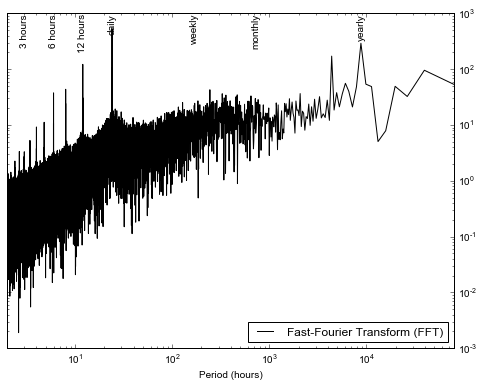

In [11]:
plt.figure(figsize=(8, 6))
plt.loglog(np.ma.masked_invalid(periodfft), ampfft, label = 'Fast-Fourier Transform (FFT)', c = 'black')
plt.xlim(periodfft[-1], periodfft[1])
ymin, ymax = plt.ylim(None, None)
plt.tick_params(labelleft = False, labelright = True)
plt.xlabel('Period (%s)' % tunit)
plt.legend(loc = 'lower right');

hourspertime = 1
timesperday=24/hourspertime
plt.annotate('yearly', (365*timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('monthly', (365./12.*timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('weekly', (7.*timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('daily', (timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('12 hours', (timesperday/2., ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('6 hours', (timesperday/4., ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('3 hours', (timesperday/8., ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top');

new = np.fft.irfft(freqfft, len(w))

In [ ]:
import scipy.signal
?scipy.signal

# Lomb Scargle

Of complex patterns and such

In [ ]:
from scipy.signal import lombscargle
angularfreq = 2* np.pi / periodfft[1:]
lsdata = np.ma.masked_values(unfilled_data[:], 0)
lstime = np.ma.masked_where(lsdata.mask, time[:]).compressed().astype('d')

lspgram = lombscargle(lstime, lsdata.compressed().astype('d'), angularfreq)

In [ ]:
lsamp = np.sqrt(4*(lspgram/float(lstime.size)))

In [ ]:
plt.loglog(periodfft[1:]/hourspertime, lsamp, label = 'Lomb-Scargle (LSP)', c = 'grey')
plt.xlim(periodfft[-1], periodfft[1])
ymin, ymax = plt.ylim()

plt.annotate('yearly', (365*timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('monthly', (365./12.*timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('weekly', (7.*timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('daily', (timesperday, ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('12 hours', (timesperday/2., ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('6 hours', (timesperday/4., ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top')
plt.annotate('3 hours', (timesperday/8., ymax), rotation = 90, horizontalalignment = 'center', verticalalignment = 'top');


plt.legend(loc = 'lower right')
